In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\customer chun\Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing  blanks with  0  as tensure is 0 and no total charges is recorded


In [9]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.duplicated().sum()

0

In [13]:
df["customerID"].duplicated().sum()

0

In [14]:
def conv(value):
    if value==1:
        return"yes"
    else:
        return"no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)
    

# converted 0 and 1 values of  SeniorCitizen in yes and no to easily understand the data


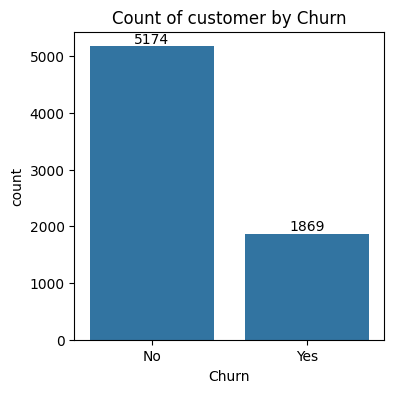

In [15]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

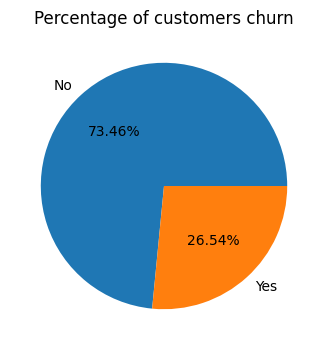

In [16]:
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.figure(figsize=(4,4))
plt.title("Percentage of customers churn")
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.show()

# acording to this figure we say that 26.54% customers have churn 


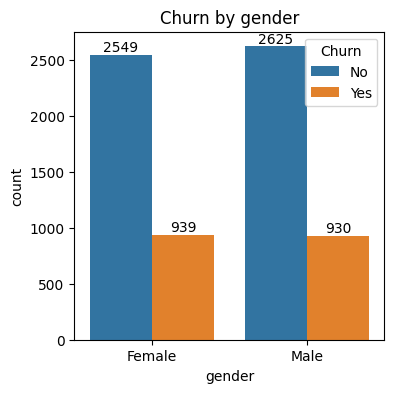

In [5]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="gender",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Churn by gender")
plt.show()

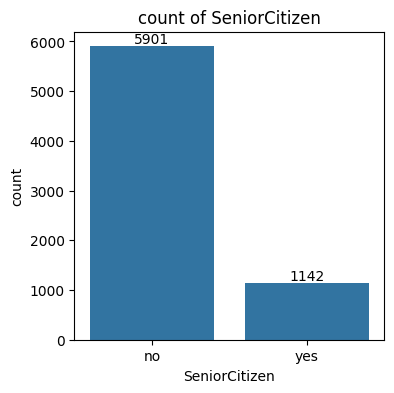

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of SeniorCitizen")
plt.show()

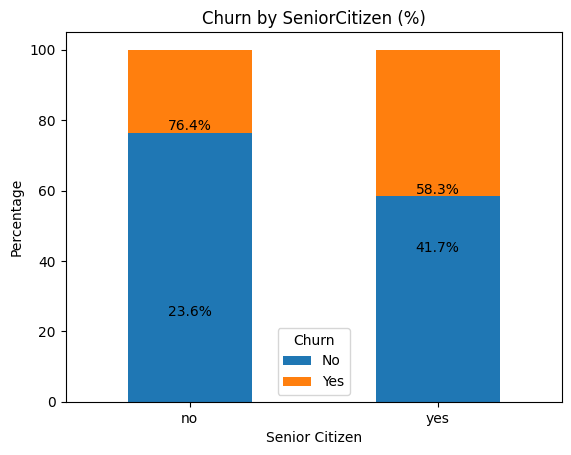

In [62]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
ax = percentages.plot(kind='bar', stacked=True)

# Adding labels and title
plt.title("Churn by SeniorCitizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

# Adding percentage labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.show()

# in senier citizens 41.7% have churned this is really high


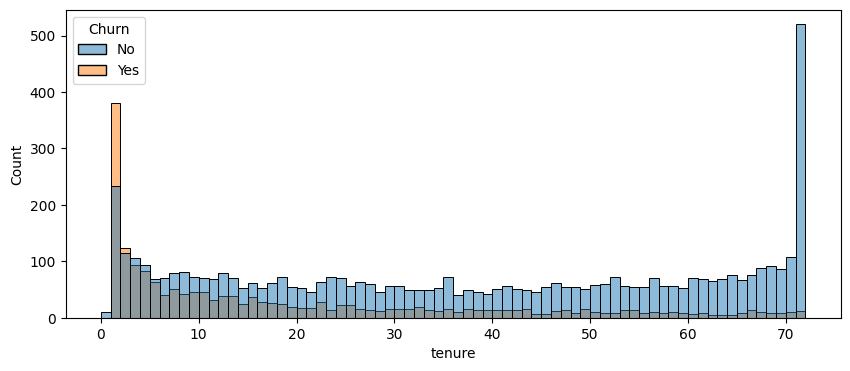

In [69]:
plt.figure(figsize=(10,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

# People who used our services for long time have stayed and who used for one  or two months have churned

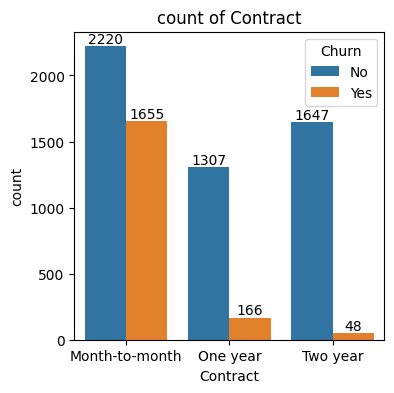

In [6]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of Contract")
plt.show()

# People who have month to month contract are more likely to churned


In [78]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

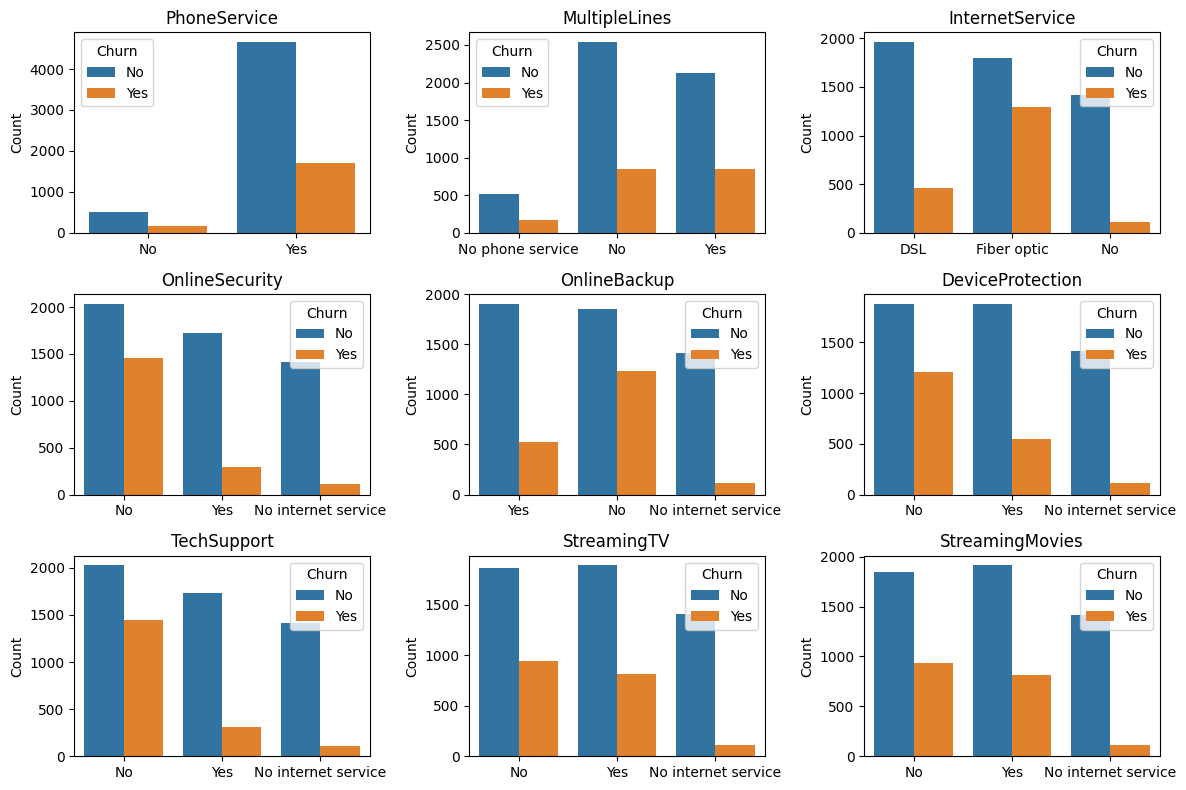

In [100]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a figure with subplots
n_cols = 3  # Number of columns for the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create count plots for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

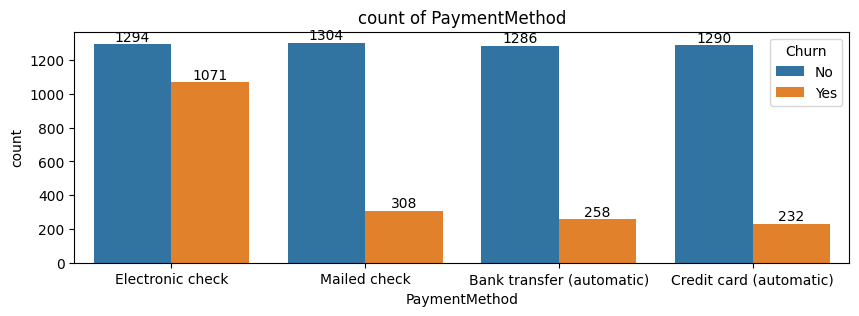

In [14]:
plt.figure(figsize=(10,3))      
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of PaymentMethod")
plt.show()

# customer is likely yo churned when he is using electronic check

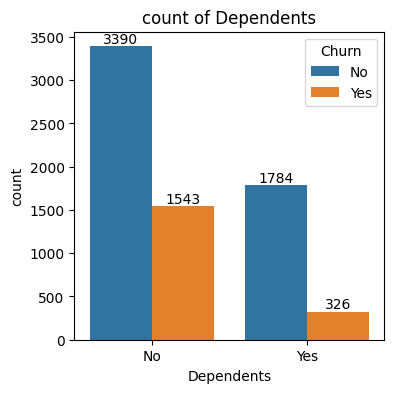

In [7]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Dependents",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of Dependents")
plt.show()

7043

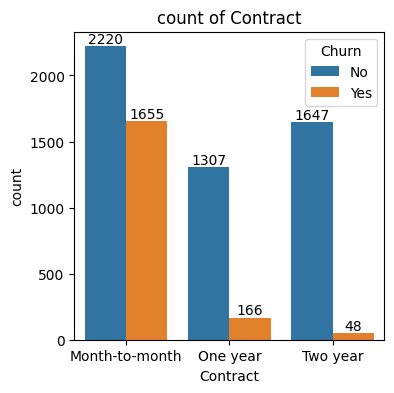

In [13]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of Contract")
plt.show()

#Churn Rate: Approximately 26.5% of customers have churned, indicating a significant portion of the customer base is at risk.

Demographics - Senior Citizens: Senior citizens have a high churn rate (41.7%), suggesting this group may need targeted retention strategies.

Tenure: Customers with short tenures, particularly those who only stayed for 1-2 months, are more likely to churn. Longer-tenure customers are more stable.

Contract Type: Month-to-month contract customers show a higher churn rate compared to those with longer contracts, such as annual plans, indicating the importance of promoting longer-term commitments.

Additional Services: Churn varies by service type. Customers who lack add-on services (e.g., online security, tech support) may be at higher risk, potentially due to lower engagement or satisfaction.

Payment Method: Customers using electronic checks have a higher churn rate compared to those using other payment methods, suggesting a preference for secure or traditional payment options.

# 
To grow sales from churn analysis:

Target At-Risk Customers: Identify and engage groups likely to churn with tailored offers or support.
Improve Early Engagement: Focus on onboarding to increase new customer retention.
Adjust Product Offers: Create more attractive bundles or flexible plans to meet customer needs.
Simplify Billing: Make payments easier to reduce churn due to billing issues.
Enhance Support: Boost customer satisfaction with faster, proactive support to retain and upsell customers.
Stay Competitive: Adjust pricing or add unique value to counter competitor influences.
These actions can help retain customers and drive revenue growth.